Part 1: Metrics and Plots (40 pts) From the chosen X.pcap file, extract and generate the following metrics for the data as captured by your program when you perform the pcap replay using tools like tcpreplay:

1: Find the total amount of data transferred (in bytes), the total number of packets transferred, and the 1 minimum, maximum, and average packet sizes. Also, show the distribution of packet sizes (eg. by plotting a histogram of packet sizes). 

Total Data Transferred: 364569320 bytes
Total Packets: 805996
Min Packet Size: 54 bytes
Max Packet Size: 1514 bytes
Average Packet Size: 452.32150035484045 bytes


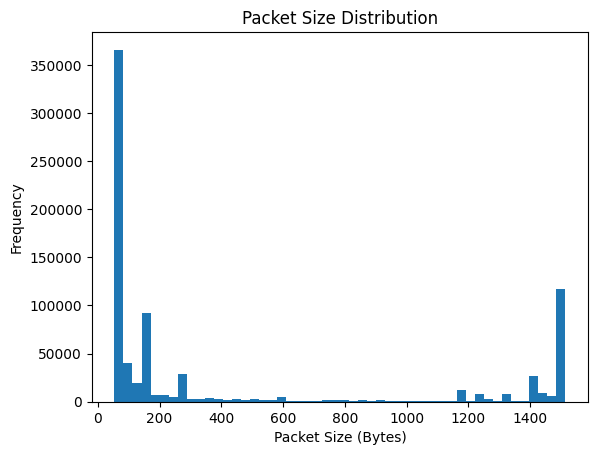

In [2]:
from scapy.all import rdpcap, IP
import matplotlib.pyplot as plt

def analyze_packet_sizes(pcap_file):
    packets = rdpcap(pcap_file)
    
    total_data = 0
    total_packets = len(packets)
    min_size = float('inf')
    max_size = 0
    size_list = []

    # Loop over all packets in the pcap file
    for packet in packets:
        if packet.haslayer(IP):  # Only process packets with IP layer
            size = len(packet)
            total_data += size
            size_list.append(size)
            min_size = min(min_size, size)
            max_size = max(max_size, size)

    # Calculate average packet size
    avg_size = total_data / total_packets if total_packets else 0

    # Print the results
    print(f"Total Data Transferred: {total_data} bytes")
    print(f"Total Packets: {total_packets}")
    print(f"Min Packet Size: {min_size} bytes")
    print(f"Max Packet Size: {max_size} bytes")
    print(f"Average Packet Size: {avg_size} bytes")

    # Plot the distribution of packet sizes
    if size_list:
        plt.hist(size_list, bins=50)
        plt.title("Packet Size Distribution")
        plt.xlabel("Packet Size (Bytes)")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("No packets with size information to plot.")
analyze_packet_sizes("5.pcap")

2: Find unique source-destination pairs (source IP port and destination IP port) in the captured data

In [3]:
def unique_source_dest_pairs(pcap_file):
    packets = rdpcap(pcap_file)
    unique_pairs = set()

    # Loop over all packets in the pcap file
    for packet in packets:
        if packet.haslayer(IP):  # Only process packets with IP layer
            src = packet[IP].src
            dst = packet[IP].dst
            unique_pairs.add((src, dst))

    # Print the unique source-destination pairs
    print(f"Unique Source-Destination Pairs: {len(unique_pairs)}")
    print(unique_pairs)
unique_source_dest_pairs("5.pcap")


Unique Source-Destination Pairs: 7665
{('172.16.133.233', '184.73.225.104'), ('98.139.161.29', '172.16.133.132'), ('172.16.133.40', '174.37.29.148'), ('93.184.216.229', '172.16.133.126'), ('68.64.5.249', '172.16.133.45'), ('172.16.133.93', '23.6.20.174'), ('172.16.133.163', '64.215.255.95'), ('172.16.133.56', '208.111.161.254'), ('96.43.146.176', '172.16.133.54'), ('172.16.133.25', '173.194.43.30'), ('172.16.133.68', '157.55.145.210'), ('172.16.133.93', '74.113.233.133'), ('172.16.133.78', '153.90.68.50'), ('172.16.133.132', '54.242.202.249'), ('172.16.133.95', '157.56.232.182'), ('64.4.23.155', '172.16.133.40'), ('172.16.133.67', '96.43.146.48'), ('173.194.43.21', '172.16.133.45'), ('138.108.7.20', '172.16.133.128'), ('173.194.43.47', '172.16.133.25'), ('96.43.146.176', '172.16.133.78'), ('172.16.133.48', '224.0.0.22'), ('172.16.133.126', '54.235.137.123'), ('172.16.133.24', '96.43.146.48'), ('172.16.133.28', '216.52.242.80'), ('172.16.133.54', '54.241.15.61'), ('172.16.133.13', '67.2

3:Display a dictionary where the key is the IP address and the value is the total flows for that IP address as the source. Similarly display a dictionary where the key is the IP address and the value is the total flows for that IP address as the destination. Find out which source-destination (source IP port and destination IP port) have transferred the most data

In [4]:
def flow_counts(pcap_file):
    packets = rdpcap(pcap_file)
    src_flow_dict = {}
    dst_flow_dict = {}

    # Loop over all packets in the pcap file
    for packet in packets:
        if packet.haslayer(IP):  # Only process packets with IP layer
            src = packet[IP].src
            dst = packet[IP].dst

            # Update source flow count
            if src in src_flow_dict:
                src_flow_dict[src] += 1
            else:
                src_flow_dict[src] = 1

            # Update destination flow count
            if dst in dst_flow_dict:
                dst_flow_dict[dst] += 1
            else:
                dst_flow_dict[dst] = 1

    # Print the flow counts
    print(f"Source Flow Counts: {src_flow_dict}")
    print(f"Destination Flow Counts: {dst_flow_dict}")
flow_counts("5.pcap")

Source Flow Counts: {'192.168.3.131': 4294, '184.85.226.161': 222, '10.0.2.2': 20, '65.54.189.173': 126, '72.14.213.147': 244, '66.220.149.32': 40, '65.54.95.75': 766, '204.14.234.85': 1036, '172.16.255.1': 1102, '65.54.95.140': 658, '10.0.2.15': 636, '65.54.95.68': 1275, '208.82.236.130': 162, '72.14.213.102': 160, '208.50.77.134': 12, '91.103.140.2': 22, '65.55.206.199': 199, '208.82.236.129': 195, '209.17.73.30': 284, '65.54.95.216': 66, '206.108.207.155': 39, '65.54.167.27': 104, '65.55.17.37': 22, '194.165.188.79': 10, '72.14.213.138': 22, '72.14.213.132': 37, '65.55.5.231': 15, '65.55.15.244': 62, '207.46.148.38': 48, '207.46.96.145': 96, '65.54.95.142': 42, '67.215.65.132': 23, '172.16.133.57': 30563, '96.43.146.176': 7492, '172.16.133.56': 10201, '68.64.21.62': 14980, '172.16.133.49': 8205, '172.16.133.103': 542, '172.16.133.43': 3607, '68.64.21.41': 6047, '67.217.94.135': 600, '67.217.94.156': 600, '67.217.94.204': 600, '172.16.133.53': 8297, '157.56.242.198': 5361, '172.16.13

4:List the top speed in terms of pps and mbps' that your program is able to capture the content without any loss of data when ij running both topreplay and your program on the same machine (VM), and s when running on oifferent machines Two student group should run the program on two different machines, eg topreplay on physical machine of studentt and sniffer program physical-machine of Muten. Single students should run between two VMs

In [5]:
def max_data_flow(pcap_file):
    packets = rdpcap(pcap_file)
    flow_data_dict = {}

    # Loop over all packets in the pcap file
    for packet in packets:
        if packet.haslayer(IP):  # Only process packets with IP layer
            src = packet[IP].src
            dst = packet[IP].dst
            flow_pair = (src, dst)
            packet_size = len(packet)

            # Update flow data count
            if flow_pair in flow_data_dict:
                flow_data_dict[flow_pair] += packet_size
            else:
                flow_data_dict[flow_pair] = packet_size

    # Find the flow with the maximum data transferred
    max_flow = max(flow_data_dict, key=flow_data_dict.get)
    print(f"Source-Destination Pair with Most Data: {max_flow}")
    print(f"Total Data Transferred: {flow_data_dict[max_flow]} bytes")
max_data_flow("5.pcap")

Source-Destination Pair with Most Data: ('172.16.133.95', '157.56.240.102')
Total Data Transferred: 17381571 bytes


Q2: 
 1.There is a tcp packet which contains the name of some file. 
   a.Find that file name.(hint: search for <The name of file is = > )
   b.Find tcp checksum of that packet
   c.Find the source ip address of that packet
 2.Find the number of packets with that ip address.
 3.From localhost I have requested for the phone to find the company name of that phone.
  (hint: search for <Company of phone is = >)
   a.Find port used by localhost.
b. Find number of packets from localhost.


2 Answers:1(a): File Name: networking_Questions.pdf
          (b): TCP Checksum: 35409
          (c):Source IP: 10.20.30.200
          2: Number of packets from 10.20.30.200: 30
          3(a):Ports used by localhost: {1001, 1002}
          ( b):Number of packets from localhost: 30
  (for code see below)

In [6]:
from scapy.all import rdpcap

def find_file_name(pcap_file):
    packets = rdpcap(pcap_file)
    for packet in packets:
        if packet.haslayer("TCP"):
            payload = bytes(packet["TCP"].payload)
            if b"The name of file is = " in payload:
                file_name = payload.split(b"The name of file is = ")[1].split(b"\x00")[0].decode("utf-8")
                print(f"File Name: {file_name}")
                return file_name
    print("File name not found")
    return None

def find_tcp_checksum(pcap_file):
    packets = rdpcap(pcap_file)
    for packet in packets:
        if packet.haslayer("TCP"):
            payload = bytes(packet["TCP"].payload)
            if b"The name of file is = " in payload:
                print(f"TCP Checksum: {packet['TCP'].chksum}")
                return packet["TCP"].chksum

def find_source_ip(pcap_file):
    packets = rdpcap(pcap_file)
    for packet in packets:
        if packet.haslayer("TCP"):
            payload = bytes(packet["TCP"].payload)
            if b"The name of file is = " in payload:
                print(f"Source IP: {packet['IP'].src}")
                return packet['IP'].src

def count_packets_by_ip(pcap_file, ip_address):
    packets = rdpcap(pcap_file)
    count = 0
    for packet in packets:
        if packet.haslayer("IP") and packet["IP"].src == ip_address:
            count += 1
    print(f"Number of packets from {ip_address}: {count}")
    return count

def count_packets_from_localhost(pcap_file):
    packets = rdpcap(pcap_file)
    count = 0
    for packet in packets:
        if packet.haslayer("IP") and packet["IP"].src == "127.0.0.1":
            count += 1
    print(f"Number of packets from localhost: {count}")
    return count

# Main execution
pcap_file = "5.pcap"

# Find file name
find_file_name(pcap_file)

# Find TCP checksum
find_tcp_checksum(pcap_file)

# Find source IP
source_ip = find_source_ip(pcap_file)

# Count packets from source IP
if source_ip:
    count_packets_by_ip(pcap_file, source_ip)

# Count packets from localhost
count_packets_from_localhost(pcap_file)


File Name: networking_Questions.pdf
TCP Checksum: 35409
Source IP: 10.20.30.200
Number of packets from 10.20.30.200: 30
Number of packets from localhost: 30


30

In [8]:
def get_localhost_ports(pcap_file):
    packets = rdpcap(pcap_file)
    ports = set()  # Set to store unique ports
    for packet in packets:
        if packet.haslayer("IP") and packet["IP"].src == "127.0.0.1":
            if packet.haslayer("TCP"):
                ports.add(packet["TCP"].sport)  # Source port
                ports.add(packet["TCP"].dport)  # Destination port
            elif packet.haslayer("UDP"):
                ports.add(packet["UDP"].sport)  # Source port
                ports.add(packet["UDP"].dport)  # Destination port

    if ports:
        print(f"Ports used by localhost: {ports}")
    else:
        print("No ports found for localhost.")
    return ports
get_localhost_ports("5.pcap")

Ports used by localhost: {1001, 1002}


{1001, 1002}